# Problem 1:

# A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [192]:
df = pd.read_csv('bank_marketing_part1_Data-1.csv')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


# Obsevation
Top 5 record of the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


# Observation
In the dataset there are total 7 Columns and 210 rows and the columns are float Datatype.

In [5]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

# Observation
There are Zero null value in the dataset.

In [6]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


# Observation
In the dataset there are 210 rows and all the variables are float data type. In the dataset the mean and median are approximatly equal.

In [7]:
df.duplicated().sum()

0

# Observation
In this dataset there are zero duplicate rows.

# Univariate Analysis

In [8]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

# Distplot

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spending', ylabel='Density'>

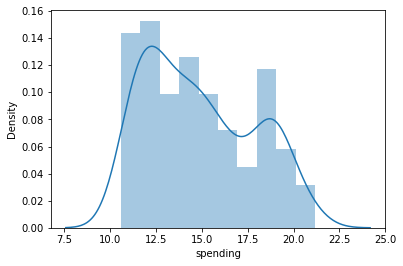

In [10]:
sns.distplot(df.spending,bins=10)

# Insight
The Customers are not spending very high amount of money.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='advance_payments', ylabel='Density'>

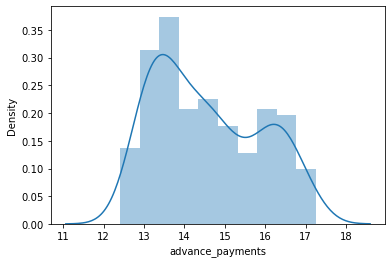

In [11]:
sns.distplot(df.advance_payments,bins=10)

# Insight
There are many customers of the bank who pay the bill in advanse.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='probability_of_full_payment', ylabel='Density'>

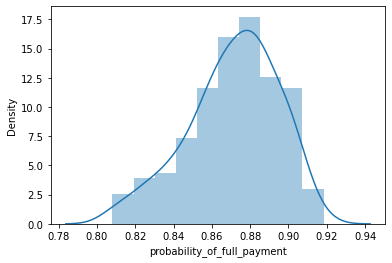

In [12]:
sns.distplot(df.probability_of_full_payment,bins=10)

# Insight
There are very high Probability that customers are pay there payments are on time.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='current_balance', ylabel='Density'>

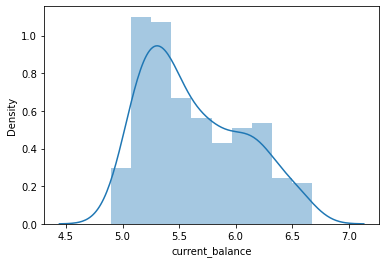

In [13]:
sns.distplot(df.current_balance,bins=10)

# Insight
Customers have average amount of balanse in there accounts.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_limit', ylabel='Density'>

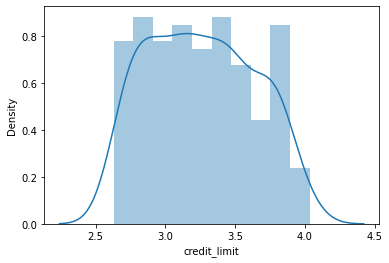

In [14]:
sns.distplot(df.credit_limit,bins=10)

# Insight
The Credit card limit is also not very high of most of the customers.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='min_payment_amt', ylabel='Density'>

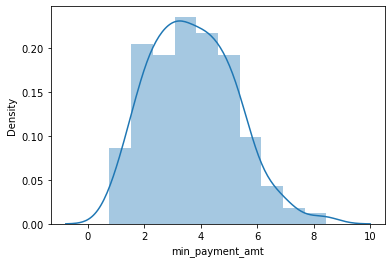

In [15]:
sns.distplot(df.min_payment_amt,bins=10)

# Insight
Minimum amount of payment is not high for the customers.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_spent_in_single_shopping', ylabel='Density'>

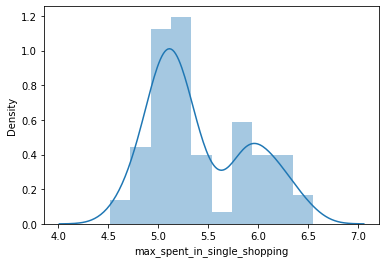

In [16]:
sns.distplot(df.max_spent_in_single_shopping,bins=10)

# Insight
There are many customers who spent more money in the shopping.

# Boxplot

In [17]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

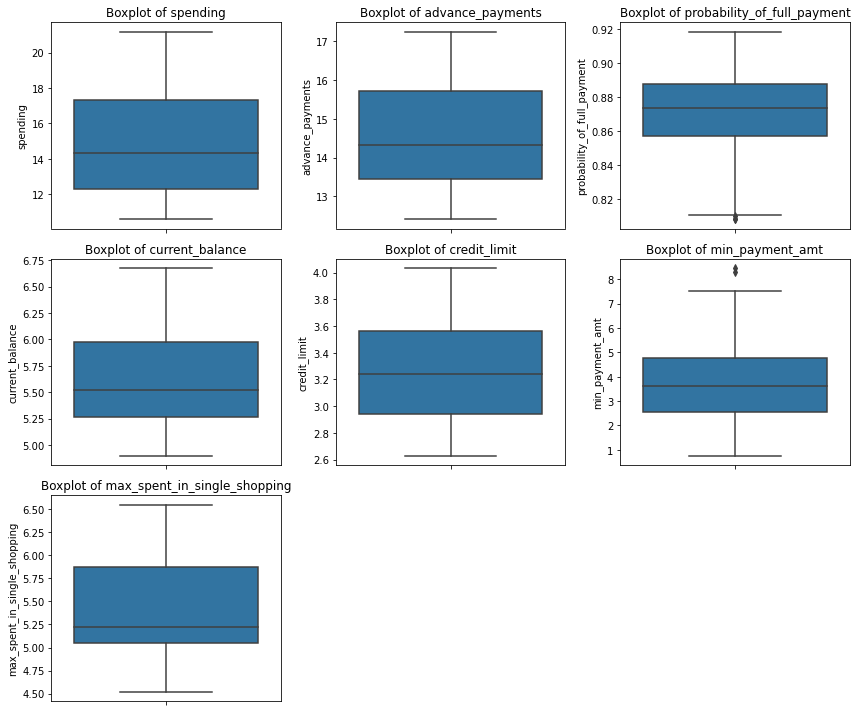

In [196]:
plt.figure(figsize = (12,10))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

# Insight

In this dataset only One variable has outlier and other's variables don't have any outliers.

# Bi/Multivariate Analysis

# Correlation plot

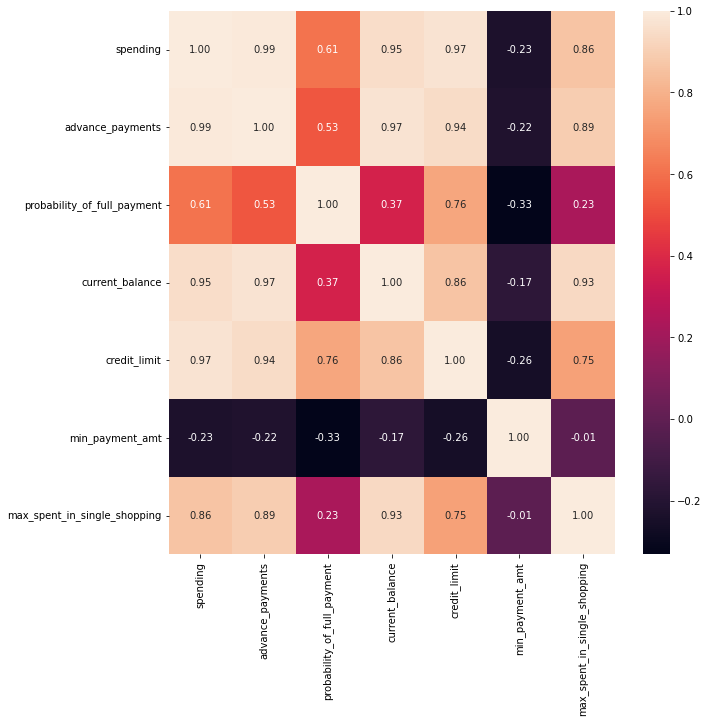

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

# Insight
Using of Heatmap we find the Correlation between the variables.In this model the variables are correlated to each other. which customer have higher credit limit they spent the higher money and which customer have higher balance they pay there all bill in advanceand and also they spent more money in the shopping.

# Pairplot

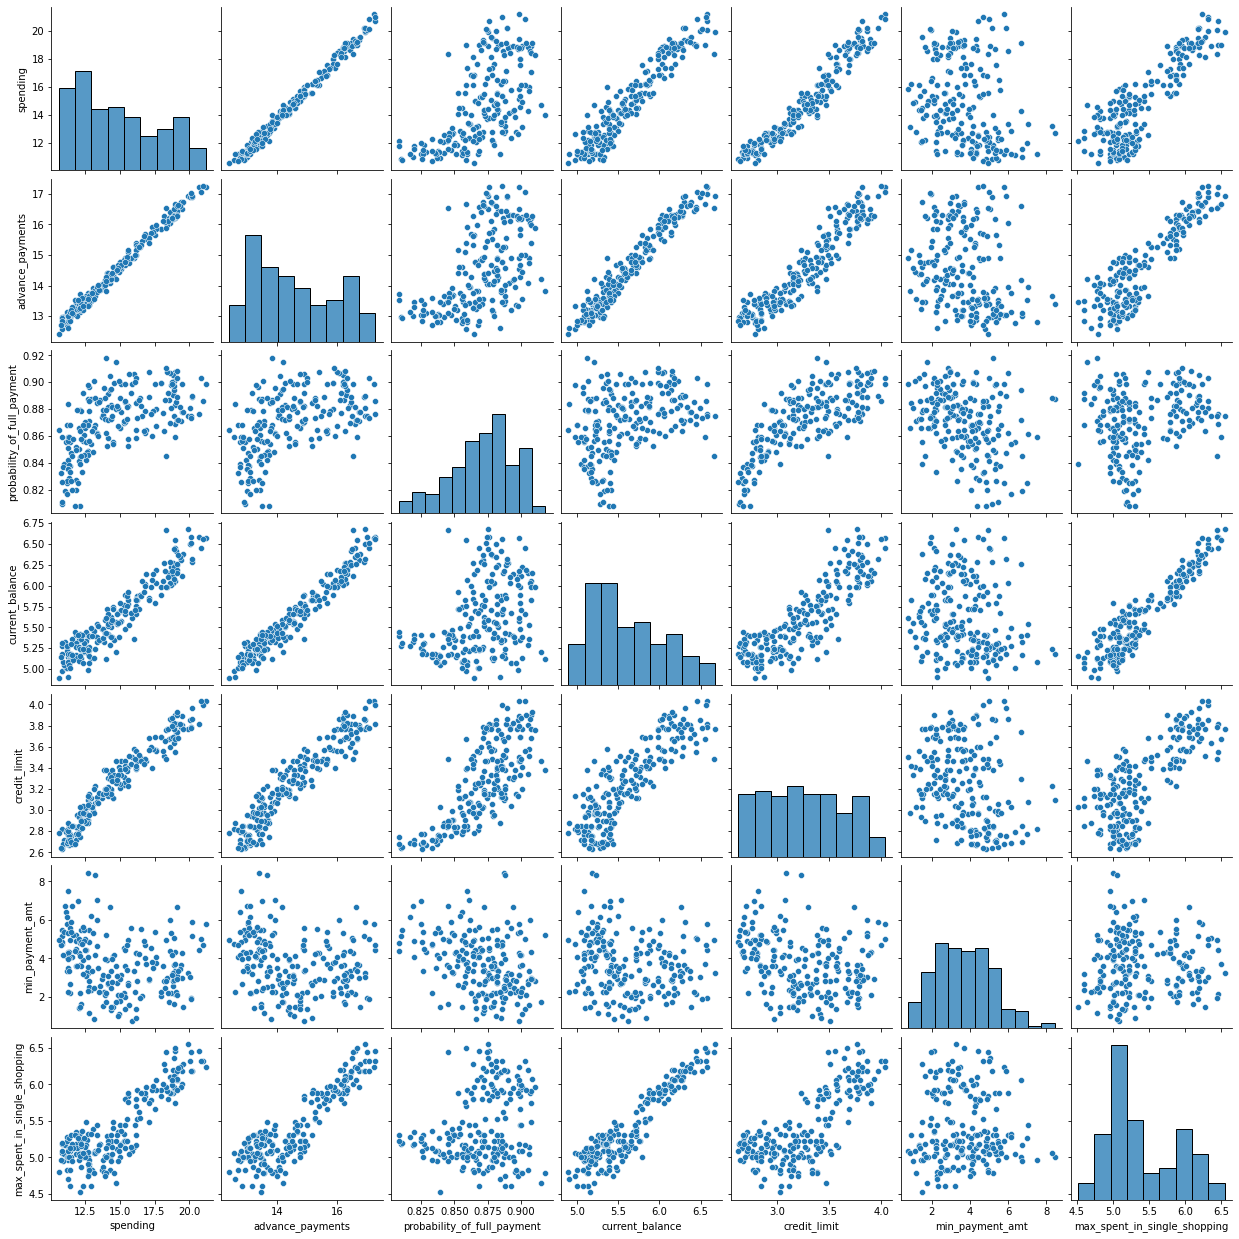

In [27]:
sns.pairplot(df)

# Insight

In this dataset all the variables are correlated to each other. If the value of one variable is increse the other will also increase.

# Skewness

In [28]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [30]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.spending),stats.skew(df.advance_payments),stats.skew(df.probability_of_full_payment),stats.skew(df.current_balance),stats.skew(df.credit_limit),stats.skew(df.min_payment_amt),stats.skew(df.max_spent_in_single_shopping)]},
                        index=['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'])  
Skewness

,Skewness
spending,0.397027
advance_payments,0.383806
probability_of_full_payment,-0.534104
current_balance,0.521721
credit_limit,0.133416
min_payment_amt,0.398793
max_spent_in_single_shopping,0.557876


# Insight

Max spent in shopping variable has highest skewness as compair to others.

# 1.2 Do you think scaling is necessary for clustering in this case? Justify

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
X = StandardScaler()

In [33]:
scaled_df = X.fit_transform(df)
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

# Insight
Scaling is necessary for clustering in this case. The clustering algo. like K-Means needs features are in scaling before apply the clustering algo.In this we use the Satndard scaler. We import the standard Scaler from sklearn. then we use the .Fit Transform for scaling the data of feature.

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [34]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


# Insight
In the dataset there are 210 rows and all the variables are float data type. In the dataset the mean and median are approxly equal.

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [36]:
df.nunique()

spending                        193
advance_payments                170
probability_of_full_payment     186
current_balance                 188
credit_limit                    184
min_payment_amt                 207
max_spent_in_single_shopping    148
dtype: int64

In [37]:
wardlink = linkage(df, method = 'ward')

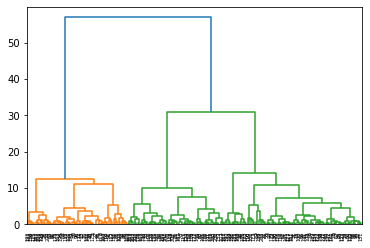

In [38]:
dend = dendrogram(wardlink)

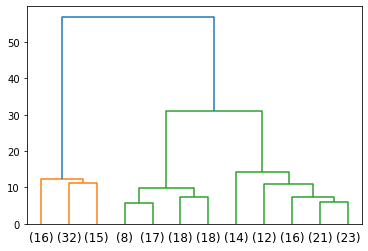

In [39]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 12,
                 )

# Insight
For making the dendrogrm we use ward method linkage library and there are two clusters.

In [40]:
wardlink = linkage(df, method = 'average')

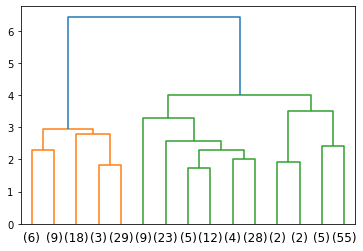

In [41]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 15,
                 )

# Insight
In this we use average method linkage library and there are two clusters.

In [42]:
from scipy.cluster.hierarchy import fcluster

In [43]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 3,
       1, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 2, 2, 1, 3, 2, 2, 2,
       1, 3, 2, 1, 2, 3, 3, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 2, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       2, 2, 2, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2, 2, 2, 3, 2, 1, 1, 1,
       2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [44]:
df['clusters'] = clusters

In [45]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [46]:
df.clusters.value_counts().sort_index()

1    65
2    81
3    64
Name: clusters, dtype: int64

In [47]:
aggdata=df.iloc[:,0:8].groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.569231,16.235077,0.884386,6.183723,3.705569,3.636262,6.047231,65
2,14.232716,14.261358,0.877623,5.500580,3.221778,2.679249,5.136136,81
3,11.845781,13.234375,0.849017,5.226609,2.851266,5.057281,5.103094,64


# Insight
Cluster 1 banks performance are good as compair to other.

Cluster 2 banks performance are average. .

Cluster 3 banks performance are poor

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(df.iloc[:,0:8])
print(Cluster_agglo)

[1 2 1 0 1 0 0 2 1 0 1 2 0 1 2 0 2 0 2 2 0 0 1 2 2 2 2 0 0 0 2 0 0 2 0 0 0
 0 0 1 1 2 1 1 0 0 2 1 1 1 2 1 1 1 1 1 0 0 0 1 2 0 0 2 2 1 1 2 1 0 2 0 1 1
 0 1 2 0 1 2 2 2 2 1 0 2 2 2 1 0 2 1 2 0 0 1 1 1 0 1 2 1 2 1 2 1 1 0 0 1 2
 2 1 0 0 1 2 0 0 1 2 0 0 2 2 2 1 0 2 2 0 2 0 1 0 1 1 0 1 2 2 2 0 0 2 0 1 0
 2 0 2 0 2 2 2 2 2 0 2 1 1 0 1 1 1 0 2 2 2 2 2 0 2 1 1 1 2 2 2 0 2 2 2 2 1
 1 2 2 2 0 2 2 0 1 2 1 1 0 1 0 2 1 2 0 1 2 1 2 2 2]


In [50]:
df["Agglo_CLusters"]=Cluster_agglo

In [51]:
agglo_data=df.drop(["clusters"],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_CLusters,,,,,,,,
0,11.845781,13.234375,0.849017,5.226609,2.851266,5.057281,5.103094,64
1,18.569231,16.235077,0.884386,6.183723,3.705569,3.636262,6.047231,65
2,14.232716,14.261358,0.877623,5.500580,3.221778,2.679249,5.136136,81


# Insight

Cluster 1 bank's customer has high current balance so thats why there credit limit has also high and they spend more money as compair to other cluster's bank customers.

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
X = StandardScaler()

In [54]:
scaled_df = pd.DataFrame(X.fit_transform(df.iloc[:,0:8]),columns=df.columns[1:])

In [55]:
scaled_df

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_CLusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,-1.269842
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,0.006076
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,-1.269842
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,1.281994
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,-1.269842
...,...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631,0.006076
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153,-1.269842
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235,0.006076
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238,0.006076


In [56]:
wss =[] 

In [57]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [58]:
wss

[1679.9999999999995,
 729.2227722045711,
 444.80998861487495,
 391.6725234256131,
 349.3654883145884,
 309.81282469260316,
 284.5570956132364,
 257.8331336025001,
 235.4010666007713,
 219.342867389674]

In [59]:
a=[1,2,3,4,5,6,7,8,9,10]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

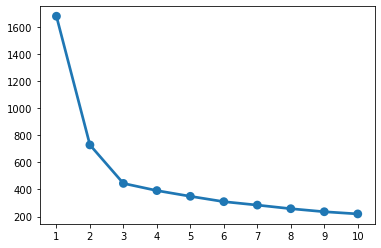

In [60]:
sns.pointplot(a, wss)

In [61]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [62]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [63]:
silhouette_score(scaled_df,labels,random_state=1)

0.43767374756776195

In [64]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [65]:
silhouette_score(scaled_df,labels,random_state=1)

0.3434929601738531

In [66]:
df["Clus_kmeans3"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_CLusters,Clus_kmeans3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,2,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3,0,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,2


In [67]:
df.Clus_kmeans3.value_counts().sort_index()

0    41
1    45
2    63
3    61
Name: Clus_kmeans3, dtype: int64

In [68]:
clust_profile=df
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=df.Clus_kmeans3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_CLusters,freq
Clus_kmeans3,,,,,,,,,,
0,13.098293,13.692683,0.876832,5.293073,3.089927,2.735515,4.932659,2.073171,1.853659,41
1,15.218222,14.751333,0.878509,5.674578,3.337000,2.751424,5.327022,1.955556,1.955556,45
2,18.641587,16.264286,0.884757,6.197810,3.713492,3.616730,6.059508,1.000000,1.000000,63
3,11.831311,13.239180,0.847328,5.232098,2.844344,5.134721,5.114607,3.000000,0.000000,61


# Insight

Cluster 2 bank's customer has high current balance so thats why there credit limit has also high and they spend more money as compair to other cluster's bank customers.

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Agglomaretive cluster--
  The Cluster 1 bank's customer has high current balance so thats why there credit limit has also high and they spend more money as compair to other cluster's bank customers.

K-Means Cluster--
 Cluster 2 bank's customer has high current balance so thats why there credit limit has also high and they spend more money as compair to other cluster's bank customers.


# Recommendation

Agglomarative Cluster--
 
Cluster 0 and Cluster 2 bank's customers have low current balance account as compair to other. So they should look more customer and they should offer more flexible rate of intrest schemes to the customers So that new customers open there account in the banks of Cluster 0 and 2 and they should increase the credit limit of the card so that the customers can use the credit card for there transcations.
 
K-Means Cluster--
 
Cluster 0 and Cluster 1 and cluster 3 bank's customers have low current balance account as compair to other. So they should look more customer and they should offer more flexible rate of intrest schemes to the customers So that new customers open there account in the banks of Cluster 0, 1 and 3 and they should increase the credit limit of the card so that the customers can use the credit card for there transcations.

# Problem 2:

# An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [137]:
df = pd.read_csv("insurance_part2_data.csv")

In [20]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


# Observation
Top 5 Record of the dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


# Observation
In the dataset there are total 10 Columns and 3000 rows and the columns.In the dataset there are 2 float, 2 integer and 6 object datatype.

In [22]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

# Observation
There are Zero null value in the dataset.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [24]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


# Observation
In the datset 3000 rows and 10 columns have numeric values. In the dataset there are outlier present in the dataset.

In [25]:
df.duplicated().sum()

139

In [26]:
df_data = df.drop_duplicates(inplace = True)

# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

# EDA

# Univariate Analysis

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

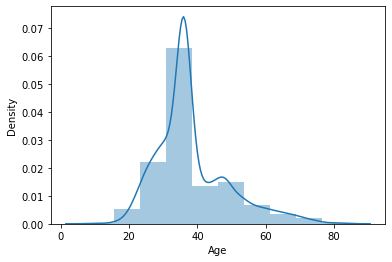

In [27]:
sns.distplot(df.Age,bins=10)

# Insight
The maximum customers who take the tour insurance are between 20 to 50 years old.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Commision', ylabel='Density'>

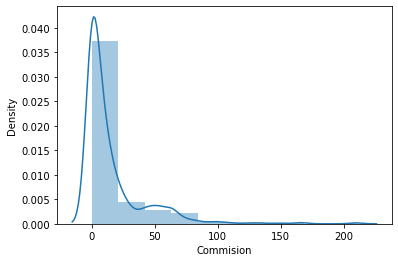

In [28]:
sns.distplot(df.Commision,bins=10)

# Insight

The commision is between 0 to 20%. 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

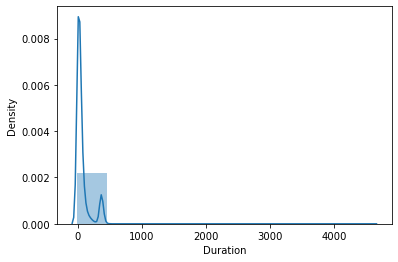

In [29]:
sns.distplot(df.Duration,bins=10)

# Insight

The duratiion is between 0 to 5 years.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

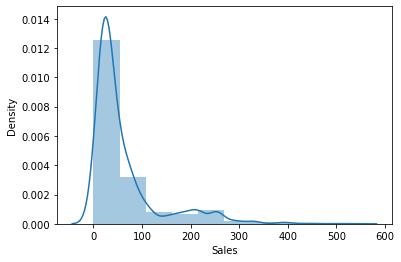

In [30]:
sns.distplot(df.Sales,bins=10)

# Insight

The sales is between 5 to 90 laks per month. 

# Skewness

In [159]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Age),stats.skew(df.Commision),stats.skew(df.Duration),stats.skew(df.Sales)]},
                        index=['Age','Commision','Duration','Sales'])  
Skewness

,Skewness
Age,1.149138
Commision,3.147283
Duration,13.777788
Sales,2.379958


# Insight--
 The Duration has highest skewness as compare to others.

In [160]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

# Boxplot

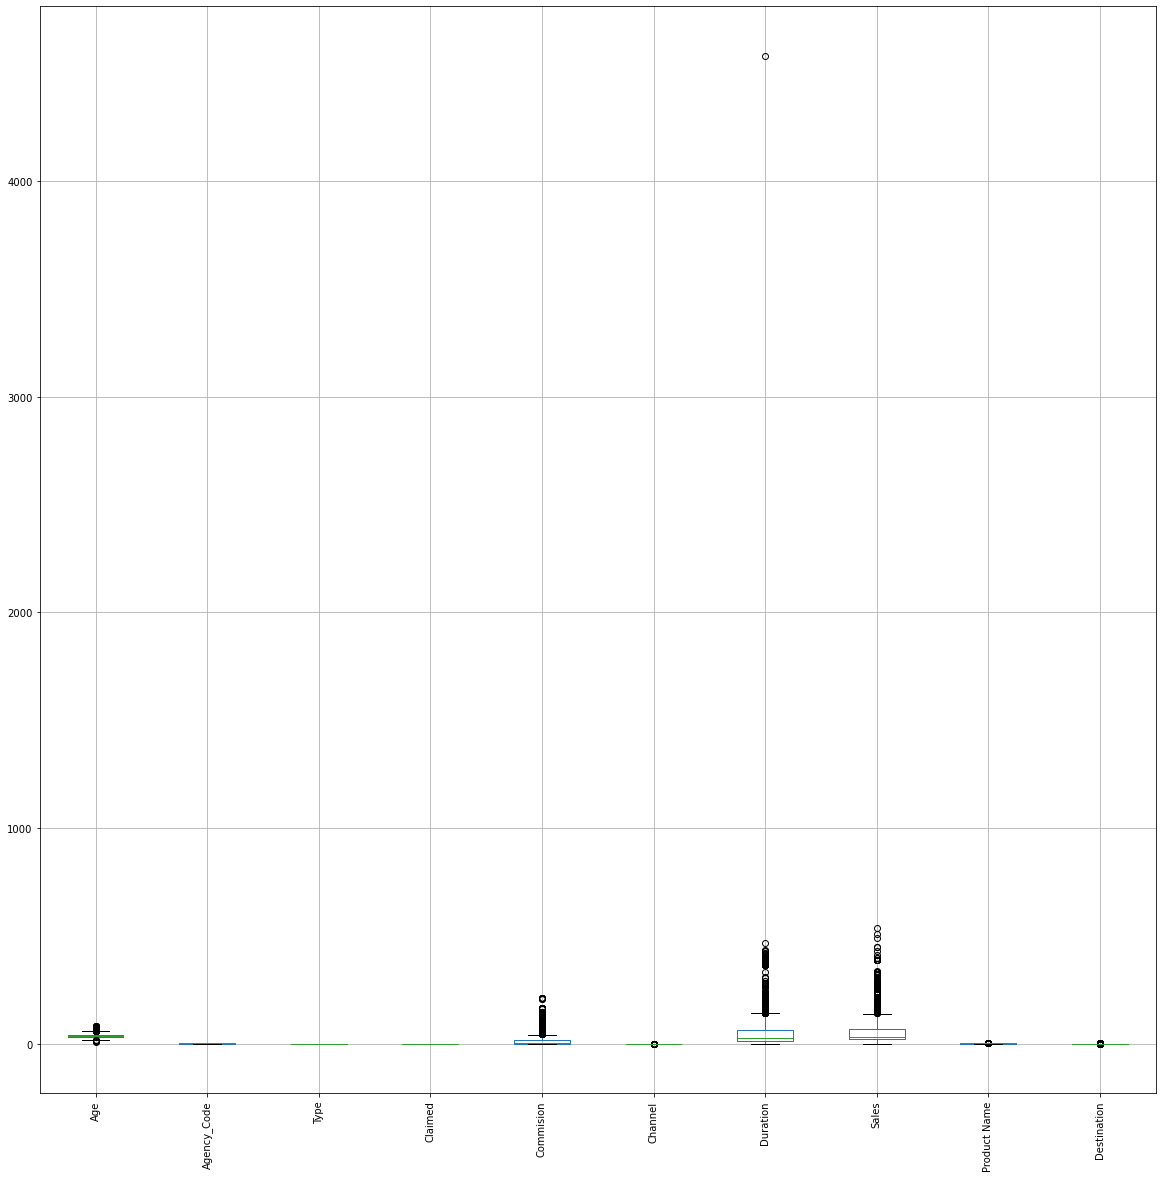

In [161]:
df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

# Insight

There are outliers in the various variabels in the dataset.

# Bi/Multivariate Analysis

# Correlation plot

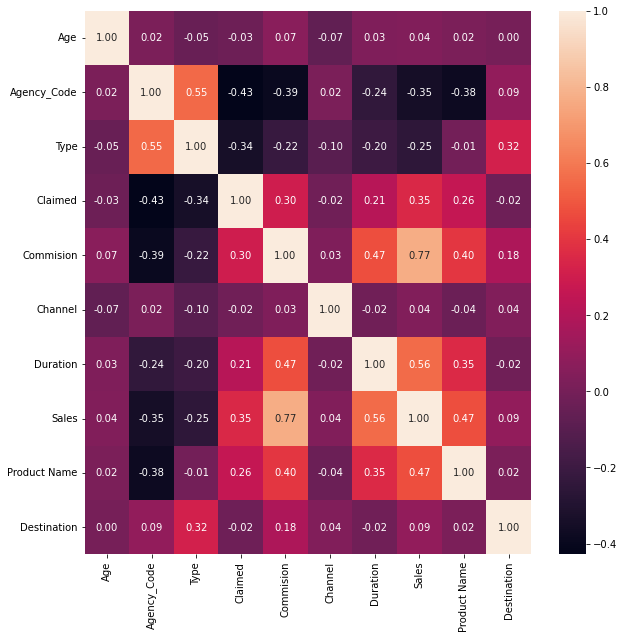

In [162]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

# Insight

In this dataset only Sales and Commision are corelated each other. If the Sales of Insurance is increse then the commission will also be increse.Apart from this the other variable are not correlated each other they are mostly constant they are not effect each other.

# Pairplot

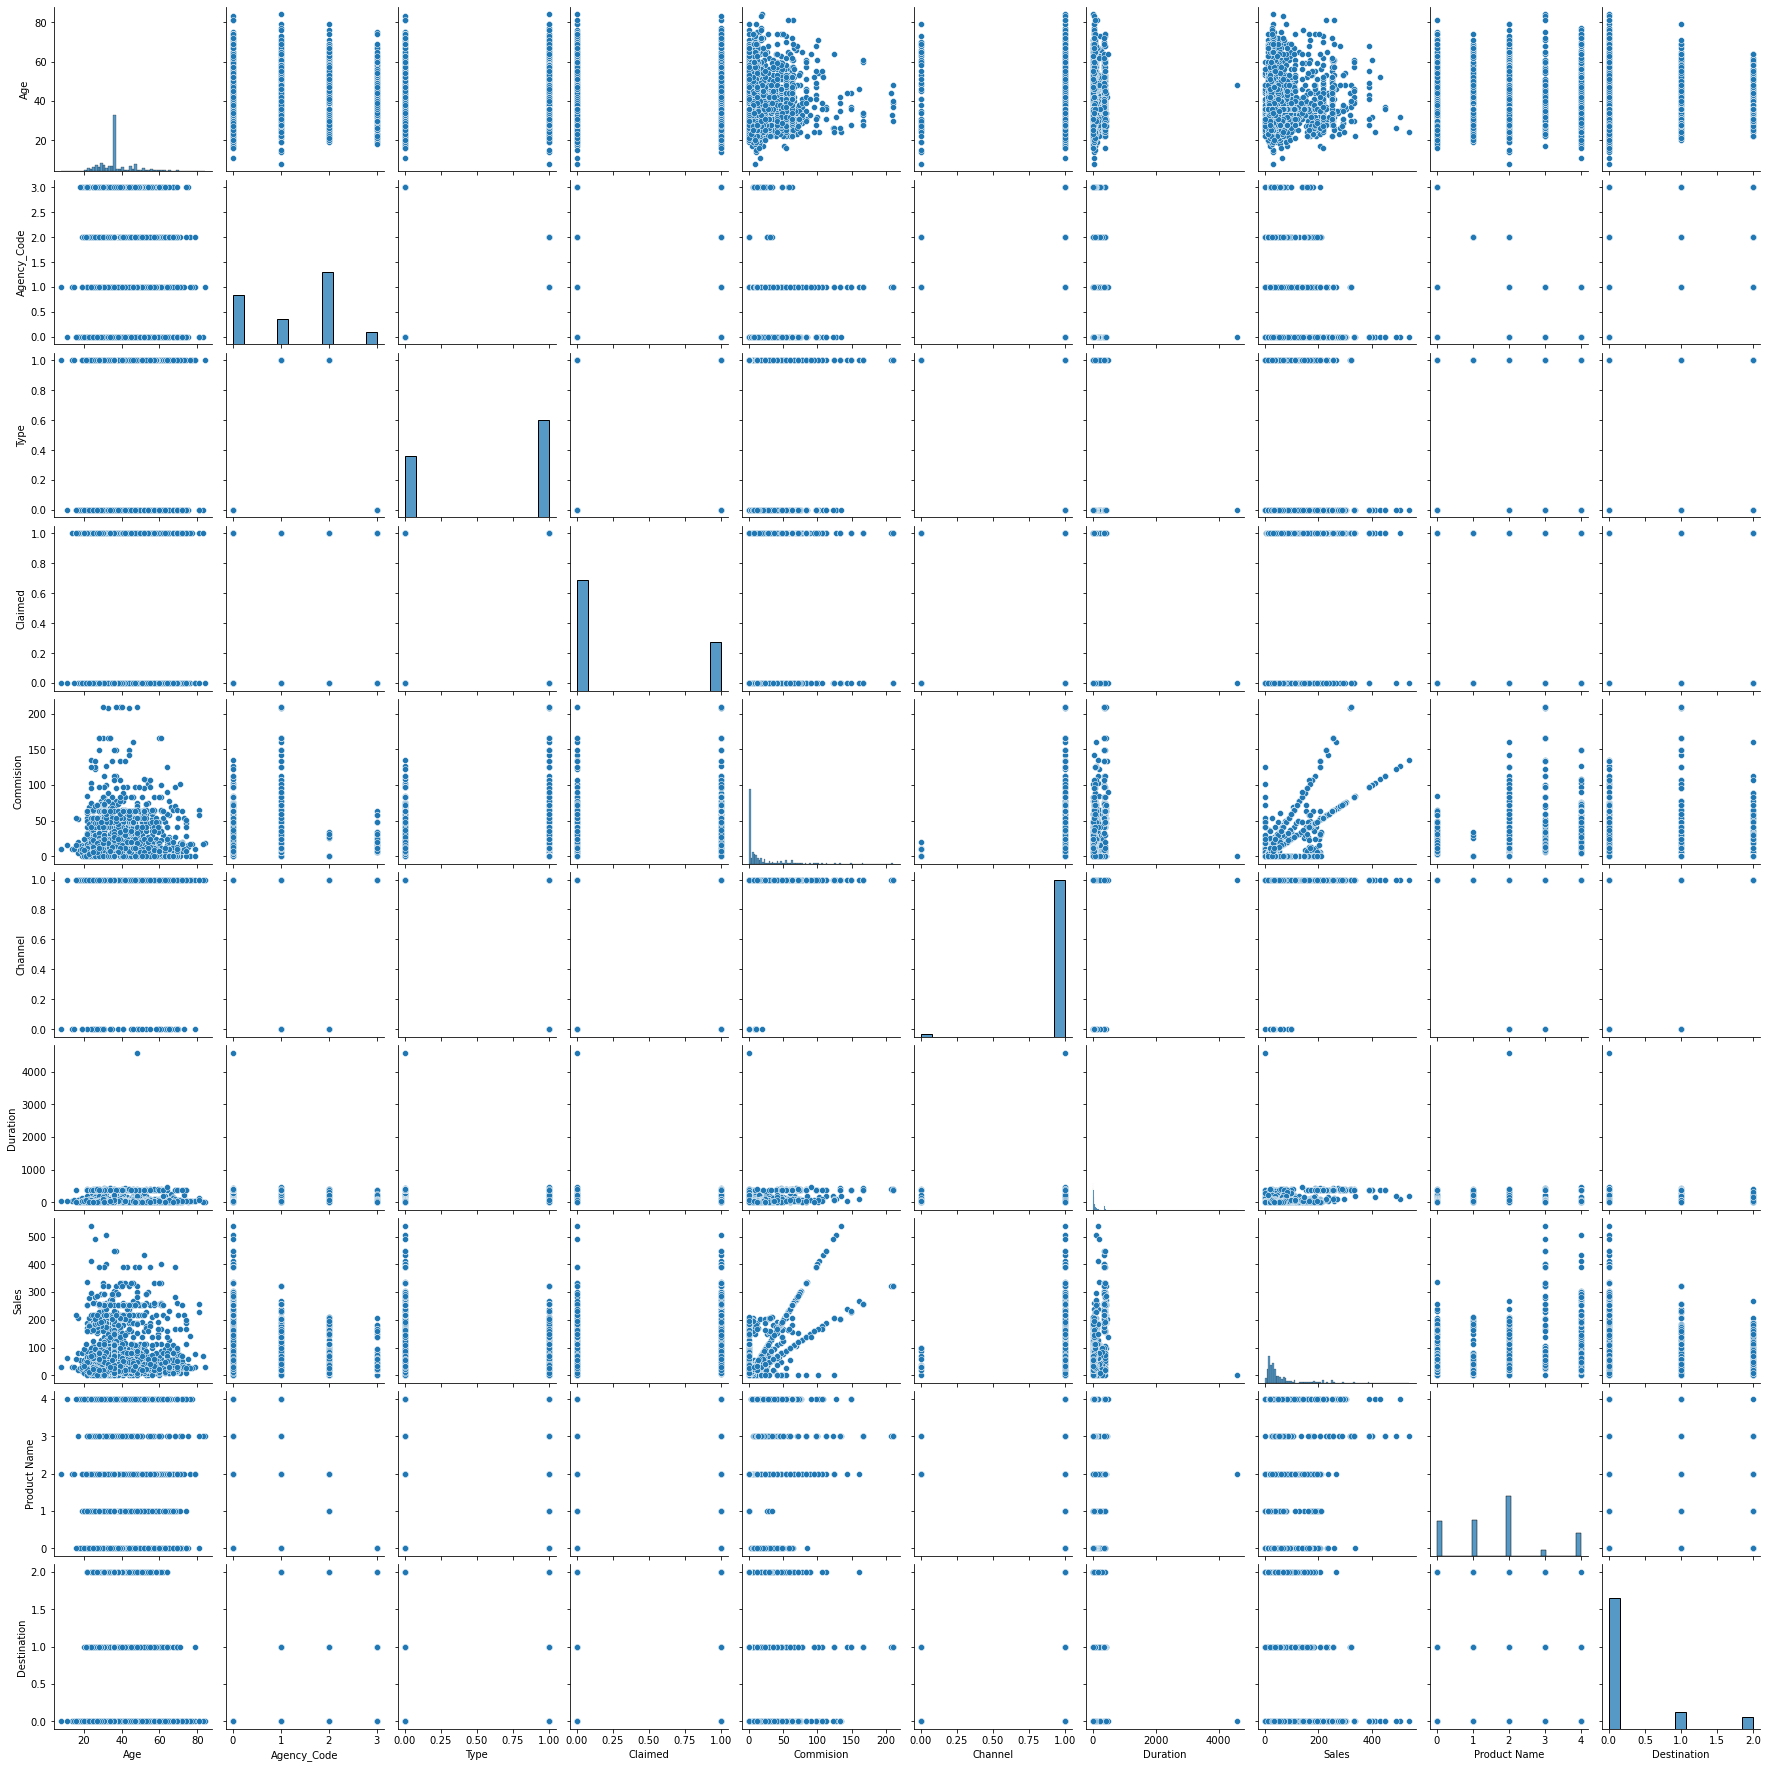

In [163]:
sns.pairplot(df)

# Insight

In this dataset only Sales and Commision are corelated each other. If the Sales of Insurance is increse then the commission will also be increse.Apart from this the other variable are not correlated each other they are mostly constant they are not effect each other.

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [145]:
X = df.drop("Claimed" , axis =1)

y = df["Claimed"]

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

# CART

In [147]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [152]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [149]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [150]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [151]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.175515
Agency_Code   0.198294
Type          0.000689
Commision     0.079739
Channel       0.007645
Duration      0.273090
Sales         0.209377
Product Name  0.038334
Destination   0.017316


In [118]:
y_predict = dt_model.predict(X_test)

In [119]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [120]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

# Insight--
 The max_depth of tree is 7, min_samples_leaf is 10 and min_samples_split is 30.

# Random Forest

In [71]:
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(X_train, train_labels)

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [83]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [84]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 100,
 'min_samples_split': 150,
 'n_estimators': 301}

In [85]:
best_grid = grid_search.best_estimator_

In [86]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

# Insight--
  The Best max_depth is 7. The best max_feature is 4. best min_samples_leaf is 100, best min_samples_split is 150, best n_estimators is 301. 

# Artificial Neural Network

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()

In [79]:
X_train = sc.fit_transform(X_train)

In [80]:
X_train

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [81]:
X_test = sc.transform(X_test)

In [167]:
X_test

array([[-0.68701032, -0.27289013,  0.83463176, ...,  0.50829455,
         0.24339146, -0.44775345],
       [ 2.79357258,  0.71683095,  0.83463176, ..., -0.45535606,
        -0.53499465, -0.44775345],
       [ 0.34775757, -1.2626112 , -1.19813318, ...,  0.32406723,
         1.80016368, -0.44775345],
       ...,
       [ 1.19438584, -1.2626112 , -1.19813318, ..., -0.63958338,
        -1.31338076, -0.44775345],
       [ 1.38252546,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345]])

In [168]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [169]:
clf.fit(X_train, train_labels)
y_pred = clf.predict(X_test)

Iteration 1, loss = 0.64877199
Iteration 2, loss = 0.63457321
Iteration 3, loss = 0.61918321
Iteration 4, loss = 0.60534324
Iteration 5, loss = 0.59306799
Iteration 6, loss = 0.58263875
Iteration 7, loss = 0.57551094
Iteration 8, loss = 0.56874923
Iteration 9, loss = 0.56143174
Iteration 10, loss = 0.55477970
Iteration 11, loss = 0.54928002
Iteration 12, loss = 0.54502823
Iteration 13, loss = 0.54130441
Iteration 14, loss = 0.53852933
Iteration 15, loss = 0.53612595
Iteration 16, loss = 0.53454374
Iteration 17, loss = 0.53281565
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


# Insight--
 The hidden layer size in ANN is 100 and the tolrance level is 0.01.

# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

# CART

AUC: 0.472


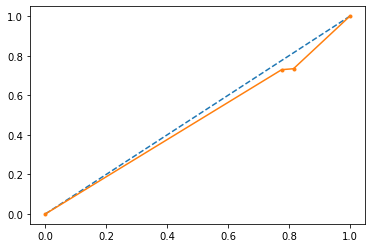

In [153]:
probs = reg_dt_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Insight
47% area is under the curve in this model.

AUC: 0.474


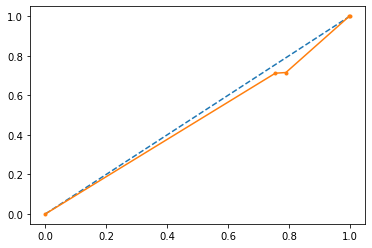

In [154]:
probs = reg_dt_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Insight
47% area is under the curve in this model.

In [121]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1471
           1       0.70      0.61      0.65       629

    accuracy                           0.81      2100
   macro avg       0.77      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [122]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       605
           1       0.68      0.49      0.57       295

    accuracy                           0.76       900
   macro avg       0.73      0.69      0.70       900
weighted avg       0.75      0.76      0.75       900



# Insight-
The accuracy in train and test are 81 and 76%. The precision and recall of train 1 are 70 and 61%. The precision and recall of test 1 are 68 and 48%.

In [123]:
confusion_matrix(train_labels, ytrain_predict)

array([[1310,  161],
       [ 248,  381]], dtype=int64)

In [111]:
confusion_matrix(test_labels, ytest_predict)

array([[537,  68],
       [149, 146]], dtype=int64)

In [112]:
reg_dt_model.score(X_train,train_labels)

0.8052380952380952

In [113]:
reg_dt_model.score(X_test,test_labels)

0.7588888888888888

# Random Forest

In [95]:
confusion_matrix(train_labels,ytrain_predict)

array([[1338,  133],
       [ 320,  309]], dtype=int64)

In [93]:
confusion_matrix(test_labels,ytest_predict)

array([[564,  41],
       [182, 113]], dtype=int64)

In [96]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1471
           1       0.70      0.49      0.58       629

    accuracy                           0.78      2100
   macro avg       0.75      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [98]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       605
           1       0.73      0.38      0.50       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.67       900
weighted avg       0.75      0.75      0.73       900



# Insight-
The accuracy in train and test are 78 and 75%. The precision and recall of train 1 are 70 and 49%. The precision and recall of test 1 are 73 and 38%.

AUC: 0.717


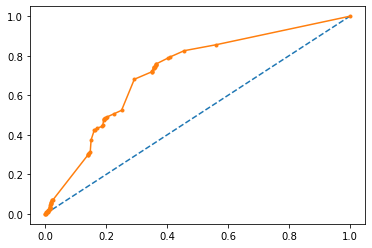

In [182]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Insight
71% area is under the curve in this model.

AUC: 0.740


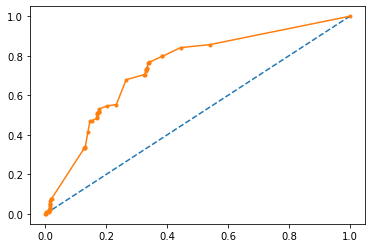

In [183]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Insight
74% area is under the curve in this model.

# Artificial Neural Network

In [184]:
cm = confusion_matrix(test_labels, y_pred)
cm

array([[566,  22],
       [193,  78]], dtype=int64)

In [185]:
pred2 = clf.predict(X_train)
confusion_matrix(train_labels,pred2)

array([[1306,   53],
       [ 477,  166]], dtype=int64)

In [186]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       588
           1       0.78      0.29      0.42       271

    accuracy                           0.75       859
   macro avg       0.76      0.63      0.63       859
weighted avg       0.76      0.75      0.71       859



In [187]:
print(classification_report(train_labels, pred2))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      1359
           1       0.76      0.26      0.39       643

    accuracy                           0.74      2002
   macro avg       0.75      0.61      0.61      2002
weighted avg       0.74      0.74      0.69      2002



# Insight-
The accuracy in train and test are 75 and 74%. The precision and recall of train 1 are 78 and 29%. The precision and recall of test 1 are 76 and 26%.

AUC: 0.779


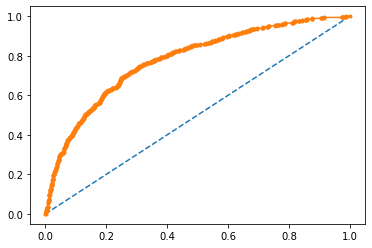

In [188]:
probs = clf.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Insight
77% area is under the curve in this model.

AUC: 0.793


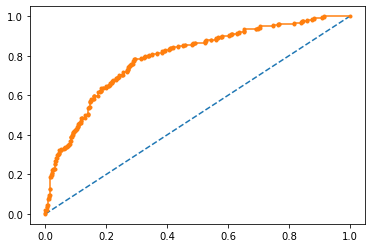

In [189]:
probs = clf.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Insight
79% area is under the curve in this model.

# 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In the ANN the AUC value is high as compare to others. The recall value is also very low as compare to Random Forest and Cart.The Recall of ANN is very poor as compair to others. So in this case the chance of false Claim is very low. So we should use the ANN for future perdiction. It will helps the Management to identify the False Claim and Real Claim

# 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

Out of the 3 models, Cart has slightly better performance than the Random Forest and Neural network model interms of overall accuracy.

The Precision of ANN is high as compare to other models.

In Insurance the Recall is important when we predict that claim is true. But in reality the claim is flase.

The Recall of ANN is very poor as compair to others. So in this case the chance of false Claim is very low. So we should use the ANN for future perdiction. It will helps the Management to identify the False Claim and Real Claim